# The Sparks Foundation.

# Name: Ashish Mahendra Yadav

# Computer Vision & Internet of Things.

## TASK 2: Color Identification in Images

## Statement-Implement an image color detector which identifies all the colors in an image or video.


# Import libraries
### Let's first import necessary libraries. We need sklearn for KMeans algorithm, matplotlib.pyplot for plotting graphs, numpy to work with arrays, cv2 to work with image data, collections to use Counter to count values, rgb2lab to convert RGB values and deltaE_cie76 to calculate similarity between colors.

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

# Working with OpenCV
## Let's first read a sample image and understand basic operations that we can do on it.

The type of this input is <class 'numpy.ndarray'>
Shape: (187, 280, 3)


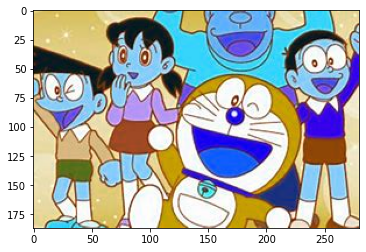

In [2]:
image = cv2.imread('/vansh/dora.png')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

## Output
# The type of this input is <class 'numpy.ndarray'>
# Shape: (187, 280, 3)

### We see that the image has different colors as compared to the original image. This is because by default OpenCV reads the images in the color order BLUE GREEN RED i.e. BGR. Thus, we need to convert it into REG GREEN BLUE i.e. RGB.

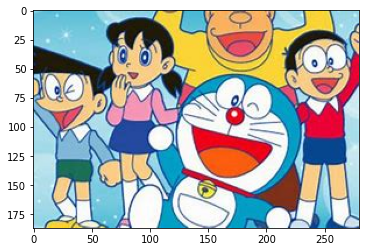

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

### The image can also be converted to grayscale if needed.

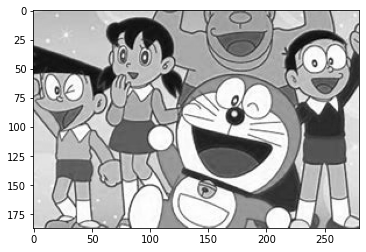

In [4]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

### We might want to resize the image to a certain size whenever the images are huge or when we are working with multiple images of different dimensions.

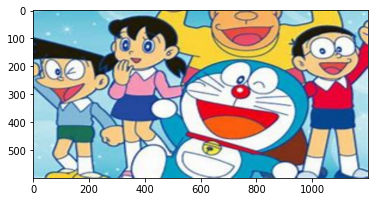

In [5]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

# Color Identification
### Not that we know a bit about OpenCV, let's start identifying colors from an image.

### First, we will define a function that can give us the hex values of our the colors that we will identify.

In [6]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [7]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [8]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([141.1703008 , 202.52090278, 224.7183419 ]),
 array([ 27.08282646, 112.88893371, 159.41624255]),
 array([243.4358682 , 205.01088815,  69.38826816]),
 array([217.63498119,  42.62228261,  51.61350334]),
 array([239.51347593, 246.09809505, 247.1981105 ]),
 array([233.7707823 , 194.82107976, 152.59482073]),
 array([133.19241666, 119.04811597, 118.21777316]),
 array([50.05764897, 40.81903002, 42.01284594])]

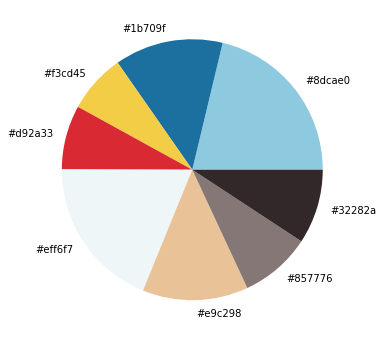

In [9]:

get_colors(get_image('/vansh/dora.png'), 8, True)

# Search images using Color
### From the model above, we can extract the major colors. This create the opportunity to search for images based on certain colors. We can select a color and if it's hex matches or is close to the hex of the major colors of the image, we say it's a match.

### We first get all the images and store them in the images variable.

In [10]:
IMAGE_DIRECTORY = '/images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

### We can now see all the images.

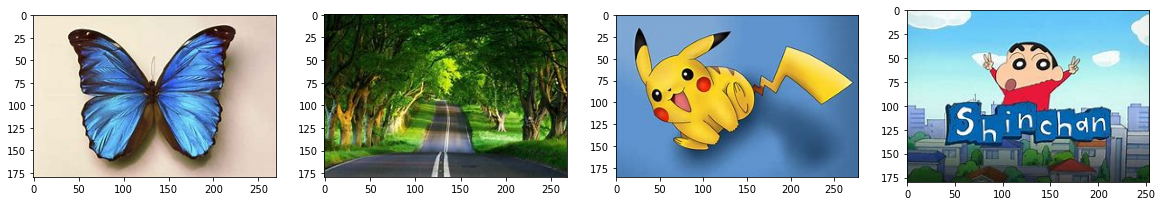

In [11]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [12]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

### We call the above method for all the images in our set and show relevant images out of the same that approximately match our selected color.

In [13]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

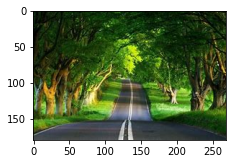

In [14]:
# Search for GREEN
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

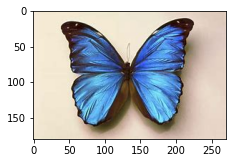

In [15]:
# Search for BLUE
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

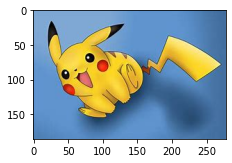

In [16]:
# Search for YELLOW
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)


## Conclusion
### In this notebook, we used KMeans to extract majority colors from images. We then used the RGB Values of Colors to identify images from a collection that have that color in them.